In [8]:
import matplotlib.pyplot as plt #importing matplotlib
import cv2

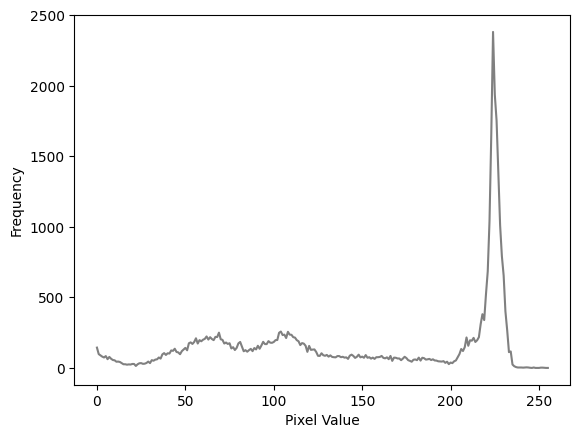

In [61]:
image = cv2.imread('./images/ship.png')
histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

# Plot the histogram
plt.plot(histogram, color='gray')

# Set labels and title
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.savefig('ship_hist.svg', format = 'svg', dpi = 1000)


In [26]:
import numpy as np
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.primitives import padding
from cryptography.hazmat.backends import default_backend

def encrypt_image1(image_path, key):
    with open(image_path, 'rb') as file:
        image_data = file.read()

    backend = default_backend()
    cipher = Cipher(algorithms.AES(key), modes.ECB(), backend=backend)
    encryptor = cipher.encryptor()

    padder = padding.PKCS7(algorithms.AES.block_size).padder()
    padded_data = padder.update(image_data) + padder.finalize()

    encrypted_data = encryptor.update(padded_data) + encryptor.finalize()

    encrypted_array = np.frombuffer(encrypted_data, dtype=np.uint8)

    return encrypted_array
from kyber import Kyber512
def save_encrypted_image(encrypted_data, output_path):
    with open(output_path, 'wb') as file:
        file.write(encrypted_data)
pk = open(f"./key/pk_cat.txt", "rb").read()
c, key = Kyber512.enc(pk)
encrypted_array = encrypt_image1('./images/lenna.png', key)
print(len(encrypted_array))
save_encrypted_image(encrypted_array, './a.png')

342352


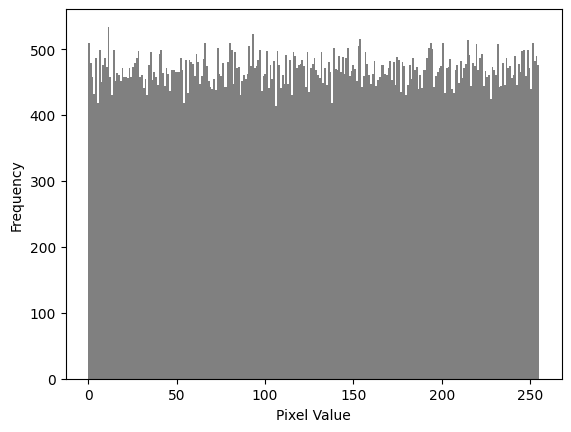

In [39]:
import cv2
import numpy as np
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.primitives import padding
from cryptography.hazmat.backends import default_backend
import matplotlib.pyplot as plt

def encrypt_image(image_path, key):
    # Read the image using OpenCV
    image = cv2.imread(image_path)

    # Convert the image to bytes
    image_data = image.tobytes()

    # Encrypt the image data using AES
    backend = default_backend()
    cipher = Cipher(algorithms.AES(key), modes.ECB(), backend=backend)
    encryptor = cipher.encryptor()

    padder = padding.PKCS7(algorithms.AES.block_size).padder()
    padded_data = padder.update(image_data) + padder.finalize()

    encrypted_data = encryptor.update(padded_data) + encryptor.finalize()

    return encrypted_data

# Path to the image file
image_path = './images/ship_map.png'

# AES encryption key (must be 16, 24, or 32 bytes long)
key = b'Sixteen byte key'

# Encrypt the image
encrypted_data = encrypt_image(image_path, key)

# Plot the histogram of the encrypted image
encrypted_image = np.frombuffer(encrypted_data, dtype=np.uint8)
plt.hist(encrypted_image, bins=256, color='gray')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.savefig('ship_map_hist.svg', format = 'svg', dpi = 1000)


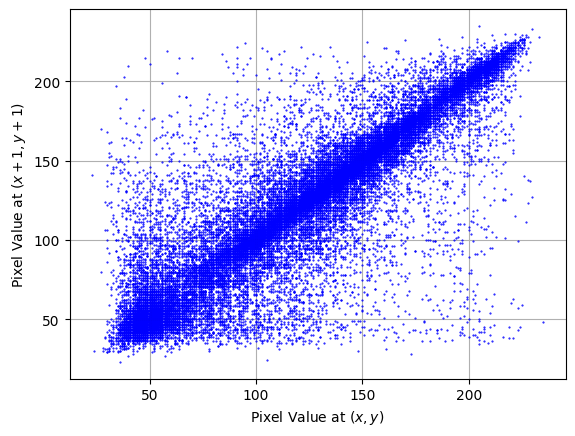

In [86]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

object = 'lenna'
# Read the image
image = cv2.imread(f'./images/{object}.png', cv2.IMREAD_GRAYSCALE)

# Get the image shape
height, width = image.shape


    # # Extract the vertical gray values
    # vertical_values = image[:-1, :].flatten()
    # vertical_values_shifted = image[1:, :].flatten()

    # # Plot the vertical direction
    # plt.plot(vertical_values, vertical_values_shifted, 'b.', markersize=1)
    
    # horizontal_values = image[:, :-1].flatten()
    # horizontal_values_shifted = image[:, 1:].flatten()

    # # Plot the horizontal direction
    # plt.plot(horizontal_values, horizontal_values_shifted, 'b.', markersize=1)

diagonal_values = image[:-1, :-1].flatten()
diagonal_values_shifted = image[1:, 1:].flatten()

# Plot the diagonal direction
plt.plot(diagonal_values, diagonal_values_shifted, 'b.', markersize=1)
plt.xlabel('Pixel Value at $(x, y)$')
plt.ylabel('Pixel Value at $(x+1, y+1)$')
plt.grid(True)
plt.savefig(f'{object}_correlation_diag.svg', format = 'svg')
# Display the plot
plt.show()


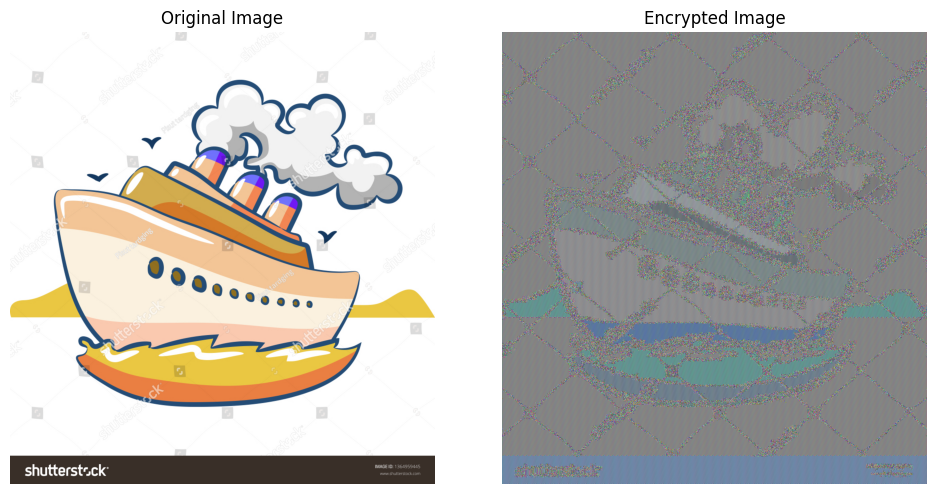

True

In [5]:
from Crypto.Cipher import AES
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the original image
image = cv2.imread('./images/m.png')

# Define the AES key and initialization vector (IV)
key = b'0123456789abcdef'  # 16-byte AES key
iv = b'1234567890abcdef'  # 16-byte IV

# Initialize AES cipher in CBC mode
cipher = AES.new(key, AES.MODE_ECB)

# Encrypt the image
encrypted_image = cipher.encrypt(image.tobytes())

# Convert the encrypted data back to a NumPy array
encrypted_image = np.frombuffer(encrypted_image, dtype=np.uint8)

# Reshape the encrypted image to match the original image shape
encrypted_image = np.reshape(encrypted_image, image.shape)

# Display the original and encrypted images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(encrypted_image, cmap='gray')
axes[1].set_title('Encrypted Image')
axes[1].axis('off')

plt.tight_layout()
plt.show()
cv2.imwrite('lenna_en.png', encrypted_image)


16


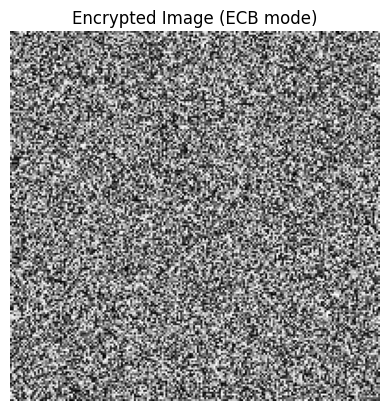

In [98]:
from Crypto.Cipher import AES
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
# Read the original image
image = cv2.imread('./images/ship.png', cv2.IMREAD_GRAYSCALE)

# Define the AES key
key = b'0123456789abcdef'  # Replace with your AES key (16, 24, or 32 bytes)
iv = b'0123456789abcdef'    # Replace with your AES IV (16 bytes)

padding_size = 16 - (image.size % 16)
print(padding_size)
# Apply PKCS7 padding to the image data
padded_image = np.pad(image, (0, padding_size), mode='constant')


# Initialize AES cipher in ECB mode
cipher = AES.new(key, AES.MODE_ECB)

# Encrypt the padded image
encrypted_image = cipher.encrypt(padded_image.tobytes())

# Convert the encrypted data back to a NumPy array
encrypted_image = np.frombuffer(encrypted_image, dtype=np.uint8)

# Reshape the encrypted image to match the original image shape
encrypted_image = np.reshape(encrypted_image[:40000], image.shape)

# Display the encrypted image
plt.imshow(encrypted_image, cmap='gray')
plt.title('Encrypted Image (ECB mode)')
plt.axis('off')
plt.show()

